In [ ]:
'''
Problem Statement:
    A glass manufacturing plant uses different earth elements to design new glass materials based on customer requirements. For that, they would like to automate the process of classification as it’s a tedious job to manually classify them. Help the company achieve its objective by correctly classifying the glass type based on the other features using KNN algorithm.

Business Objective:
The primary objective of the glass manufacturing plant is to automate the classification of glass types based on various features derived from earth elements. By implementing a K-Nearest Neighbors (KNN) algorithm, the company aims to enhance efficiency, reduce manual labor, and improve accuracy in classifying glass materials according to customer requirements.

Constraints:-
Data Quality: The dataset must be clean and free from missing or erroneous values to ensure accurate model predictions.
Computational Resources: The KNN algorithm can be computationally intensive, especially with large datasets, which may require adequate processing power.
Interpretability: The model's predictions should be interpretable to allow for adjustments based on business needs.
Feature Relevance: Not all features may contribute to the classification, necessitating careful selection and engineering of features.
'''

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Mukta\OneDrive\Desktop\Data_Science\KNN_assignment\Datasets\glass.csv")


In [5]:
# Display the first few rows of the dataset
print(data.head())


        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [7]:
# Data Preprocessing
# Check for missing values
print(data.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [9]:
# Feature Engineering: No missing values found, proceed to scaling
X = data.drop('Type', axis=1)  # Features
y = data['Type']  # Target variable

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Exploratory Data Analysis (EDA)
# Summary statistics
print(data.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

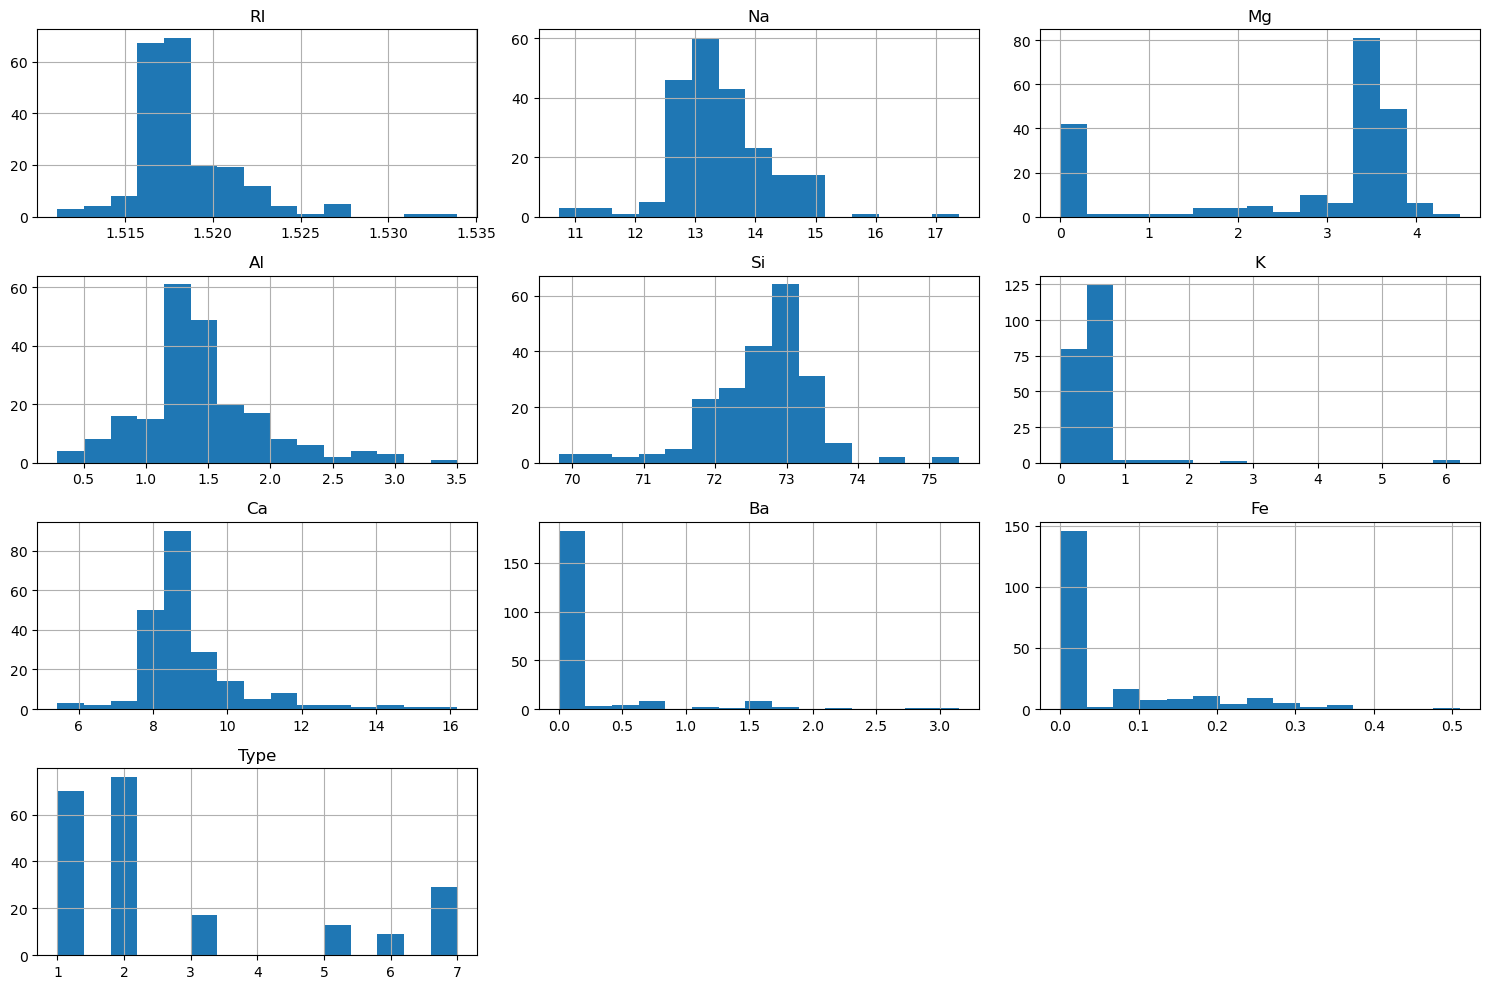

In [17]:
# Univariate Analysis: Distribution of features
data.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

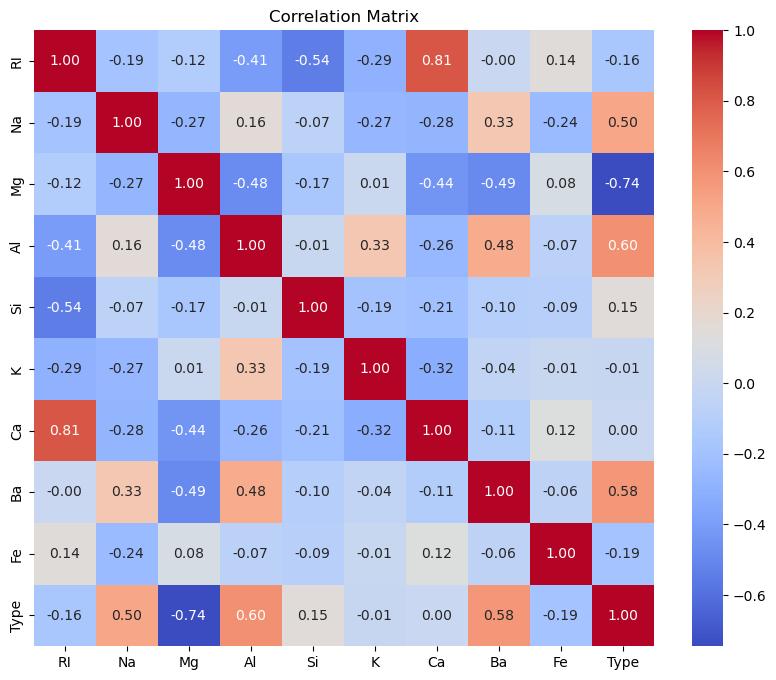

In [19]:
# Bivariate Analysis: Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Model Building
# Finding the optimal K value using cross-validation
k_values = list(range(1, 31))
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

C:\Users\Mukta\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Mukta\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Mukta\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Mukta\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Mukta\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Mukta\anaconda3\

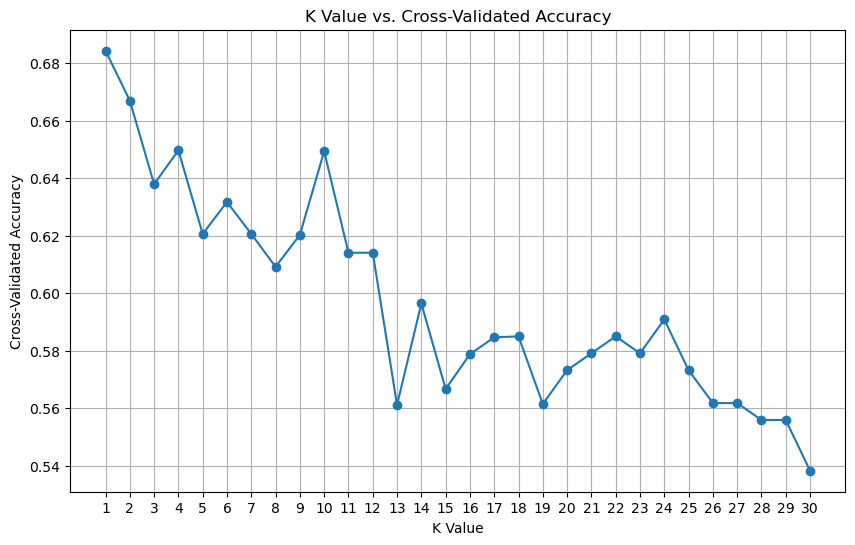

In [25]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('K Value vs. Cross-Validated Accuracy')
plt.xlabel('K Value')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

In [27]:
# Optimal K value
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f'Optimal K Value: {optimal_k}')

Optimal K Value: 1


In [29]:
# Train the KNN model with the optimal K value
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [31]:
# Predictions
y_pred = knn.predict(X_test_scaled)


In [33]:
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 8  2  1  0  0  0]
 [ 4 10  0  0  0  0]
 [ 0  1  2  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  1  7]]


In [35]:

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Benefits/Impact of the Solution
# The automated classification of glass types using KNN will:
# - Improve efficiency by reducing manual classification efforts.
# - Enhance accuracy in identifying glass types based on their features.
# - Allow the company to quickly adapt to customer requirements and preferences.
# - Facilitate better inventory management and production planning based on accurate classifications.


Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.73      0.70        11
           2       0.71      0.71      0.71        14
           3       0.67      0.67      0.67         3
           5       1.00      0.75      0.86         4
           6       0.75      1.00      0.86         3
           7       1.00      0.88      0.93         8

    accuracy                           0.77        43
   macro avg       0.80      0.79      0.79        43
weighted avg       0.78      0.77      0.77        43

